# Pokemon Stats Project
### By: Brandon Martinez
#### Goals: 
- build a model that can classify legendaries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## Acquire

**Read pokemon data from a local CSV**

In [9]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Data Summary

In [10]:
# columns, nulls, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**Statistical info for battle stats**

In [11]:
df.drop(columns=['#', 'Generation']).describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0


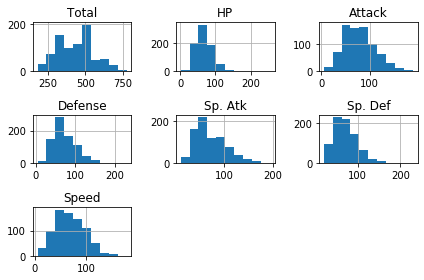

In [12]:
# look at the distribution of battle stats
df.drop(columns=['#', 'Generation', 'Legendary']).hist()
plt.tight_layout()

In [13]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

## Prepare

In [14]:
# nulls only on type 2, fill with the string 'none'
df = df.fillna('none')

In [15]:
# lower case the column names for all
df.columns = [column.lower() for column in df]

In [16]:
# rename columns for valid python identifiers 
df = df.rename(columns={'#': 'id',
                        'type 1': 'type_1',
                        'type 2': 'type_2',
                        'sp. atk': 'sp_atk',
                        'sp. def': 'sp_def'})

In [22]:
# encode boolean to 0 or 1
df['legendary'] = df.legendary.astype('int')

In [23]:
df.head()

,id,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,0


In [24]:
# split the data
train_validate, test = train_test_split(df, test_size=.15, 
                                        random_state=123)

train, validate = train_test_split(train_validate, test_size=.15, 
                                   random_state=123)
print(train.shape[0]/len(df)*100, '%')
print(validate.shape[0]/len(df)*100, '%')
print(test.shape[0]/len(df)*100, '%')

72.25 %
12.75 %
15.0 %


## Explore

Initial Hypothesis
- Pokemon with higher total stats are legendary
- Most Legendary Pokemon have only 1 type
- 

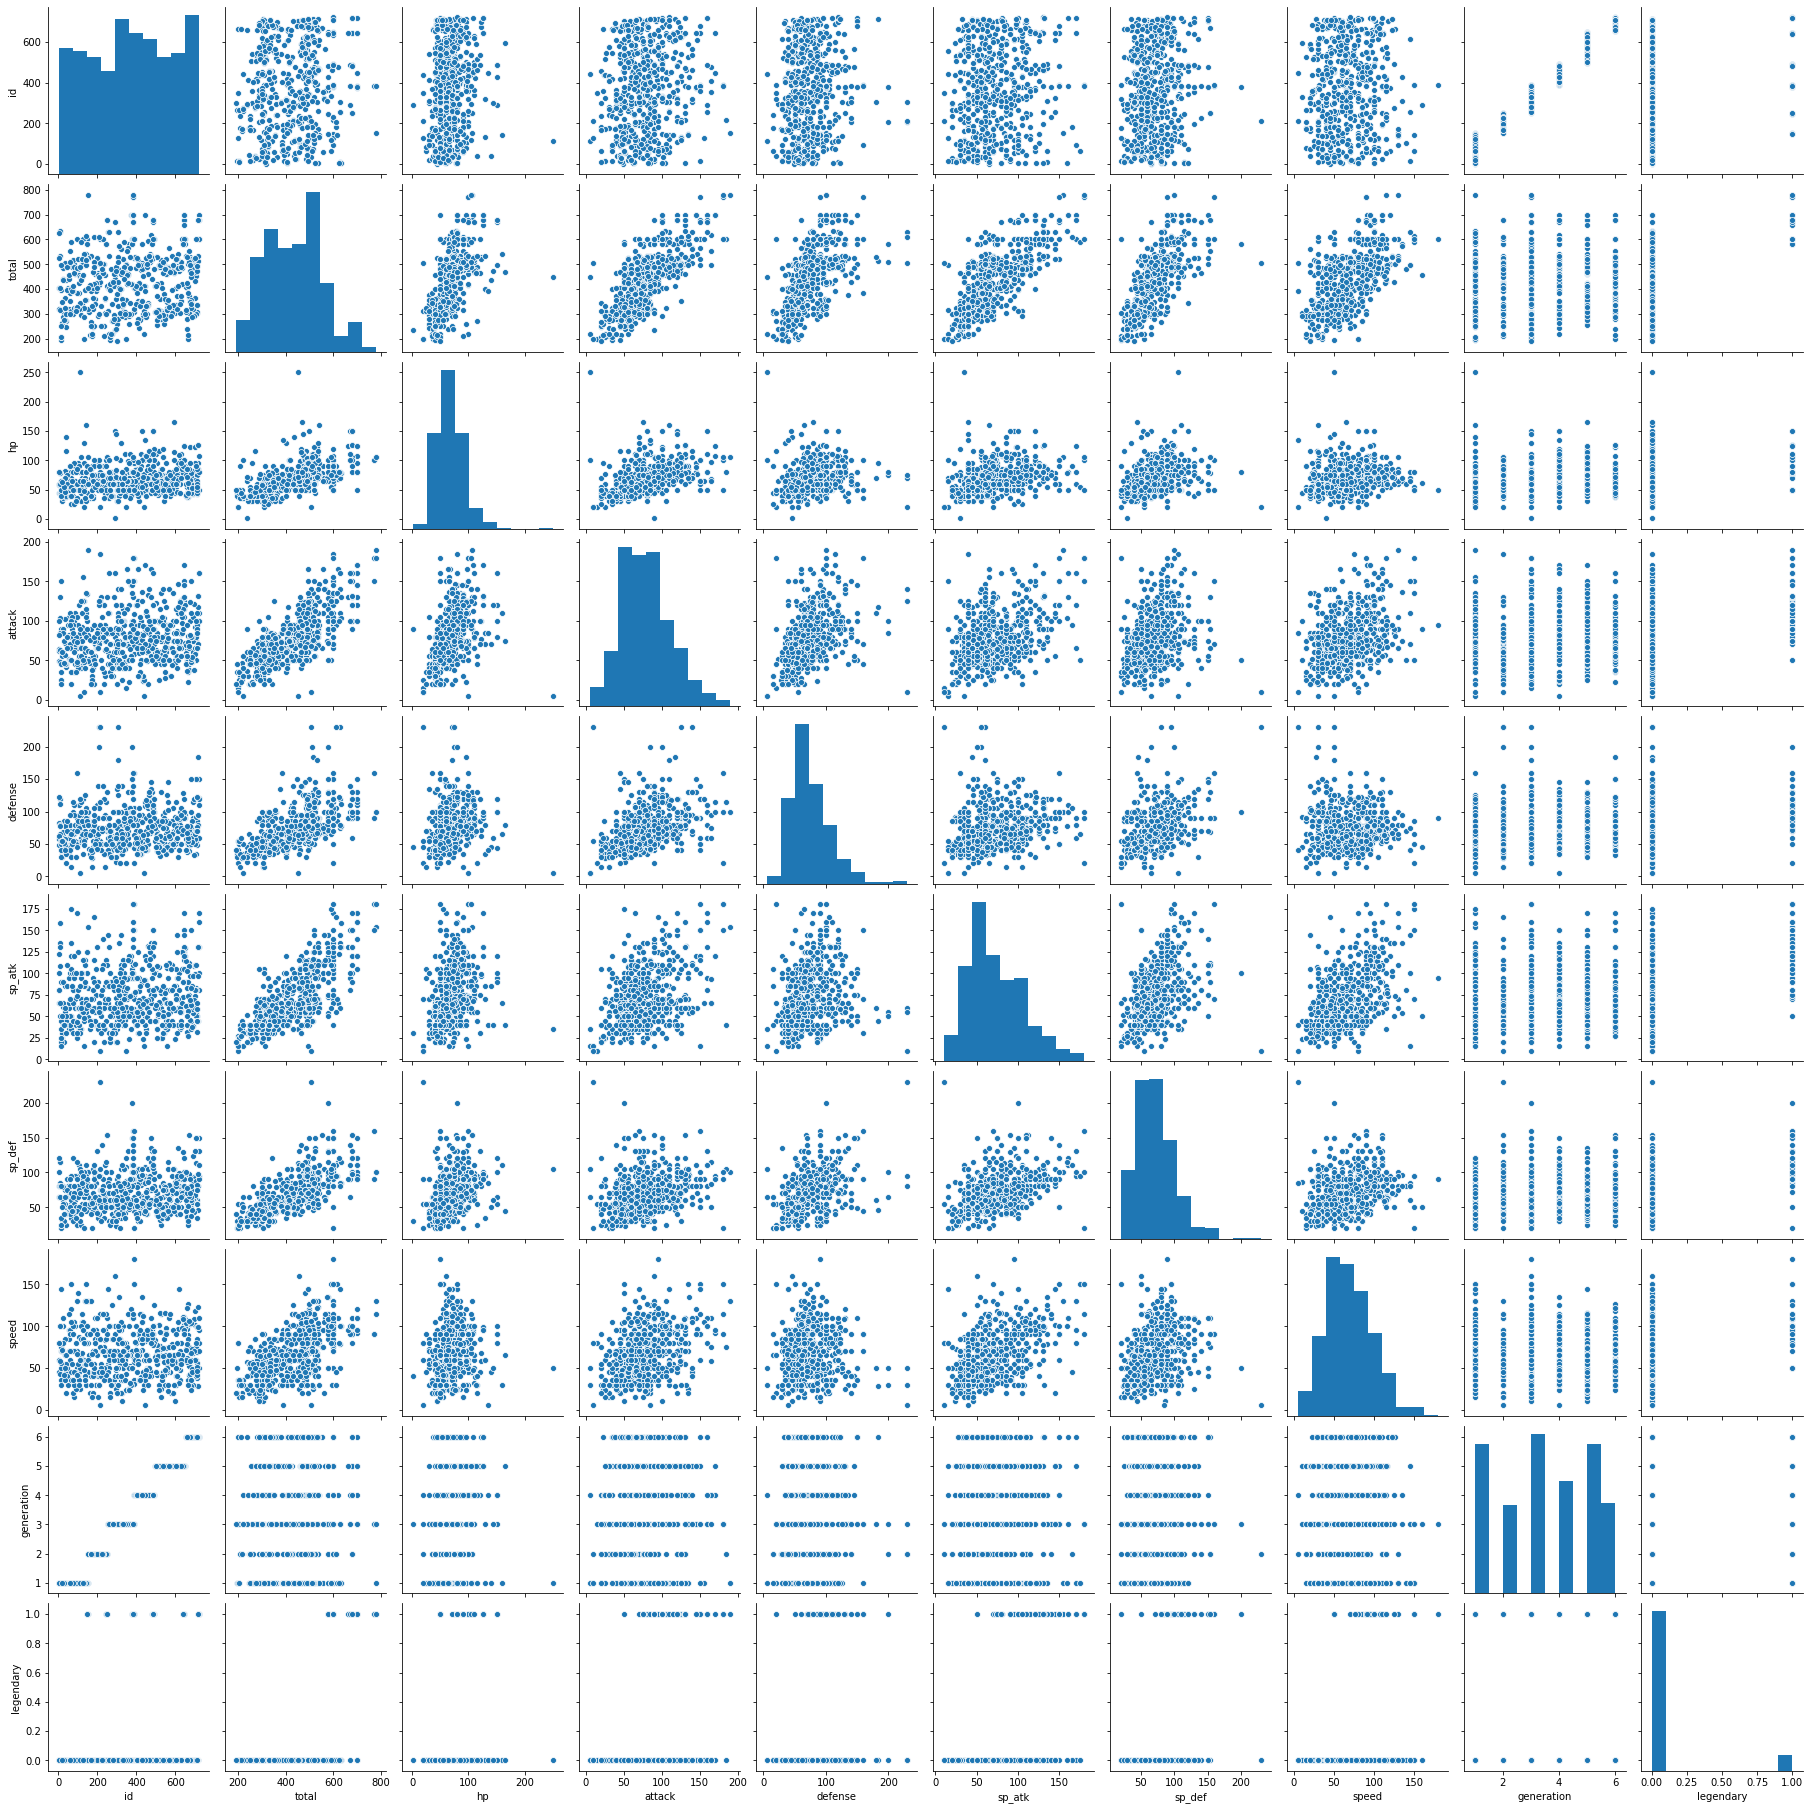

In [25]:
sns.pairplot(train)

In [73]:
# correlation for top variables with legendary
train.corr().legendary.sort_values(ascending=False).head()

legendary    1.000000
total        0.532220
sp_atk       0.462736
sp_def       0.399787
attack       0.364834
Name: legendary, dtype: float64

### Correlation Test

>**Is there a significant linear correlation between legendary and total battle stats?**

p= 1.3744616317278424e-43
r= 0.5322195452981009


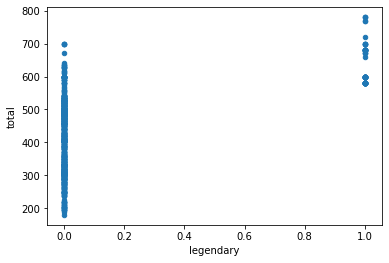

In [76]:
r, p = stats.pearsonr(train.legendary, train.total)
df.plot.scatter(y='total', x='legendary')
print('p=', p)
print('r=', r)

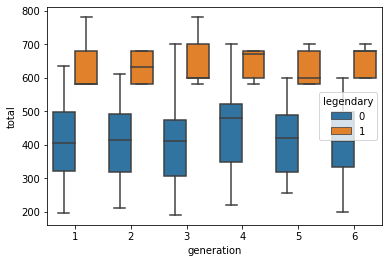

In [58]:
sns.boxplot(x=train.generation, y=train.total, hue=train.legendary)

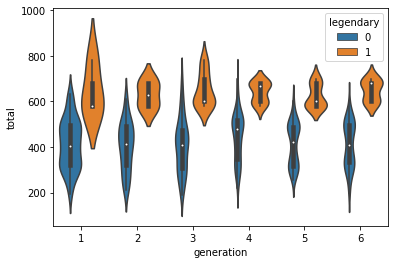

In [78]:
sns.violinplot(x=train.generation, y=train.total, hue=train.legendary)

In [67]:
train[((train.generation == 3) | (train.generation == 4)) & (train.legendary == 0)].sort_values(by='total', ascending=False).head(10)

,id,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,0
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,0
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,0
313,289,Slaking,Normal,none,670,150,160,100,95,65,100,3,0
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,0
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,0
333,306,AggronMega Aggron,Steel,none,630,70,140,230,60,80,50,3,0
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,0
546,488,Cresselia,Psychic,none,600,120,70,120,75,130,85,4,0
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,0


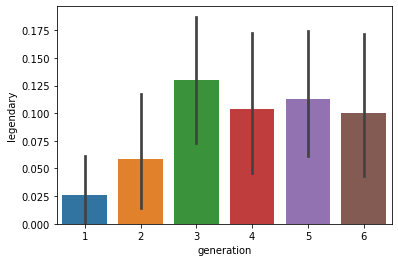

In [54]:
sns.barplot(x=train.generation, y=train.legendary)

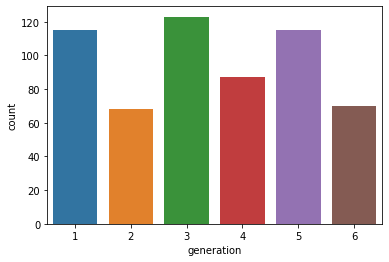

In [57]:
sns.countplot(train.generation)

## Modeling

In [81]:
#baseline
train.legendary.value_counts(normalize=True)

0    0.910035
1    0.089965
Name: legendary, dtype: float64

In [85]:
X_train = train[['total', 'sp_atk', 'sp_def']]
y_train = train[['legendary']]

X_validate = validate[['total', 'sp_atk', 'sp_def']]
y_validate = validate[['legendary']]

X_test = test[['total', 'sp_atk', 'sp_def']]
y_test = test[['legendary']]

In [90]:
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
# Create eval_df and rename the train survived column actual.
train_eval_df = train[['legendary']].rename(columns={'legendary': 'actual'})

# Predict whether a passenger will survive using the X_train data; add column to eval_df
train_eval_df['yhat'] = logit.predict(X_train)

# Estimate the probability of a passenger surviving using the X_train data; add col to eval_df

train_eval_df['probs'] = logit.predict_proba(X_train)[:, 1]

train_eval_df.head()

,actual,yhat,probs
453,0,0,0.000070
102,0,0,0.479457
492,0,0,0.000706
765,0,0,0.017219
658,0,0,0.000047


In [116]:
print('LR train accuracy', logit.score(X_train, y_train))
print('LR validate accuracy', logit.score(X_validate, y_validate))

LR train accuracy 0.9359861591695502
LR validate accuracy 0.9509803921568627


In [102]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [115]:
print('DT train accuracy', clf.score(X_train, y_train))
y_pred = clf.predict(X_validate)
print('DT Validate accuracy', clf.score(X_validate, y_validate))

DT train accuracy 0.9619377162629758
DT Validate accuracy 0.9313725490196079


In [119]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

In [120]:
print('RF train accuracy', rf.score(X_train, y_train))
print('RF validate accuracy', rf.score(X_validate, y_validate))

RF train accuracy 0.9602076124567474
RF validate accuracy 0.9705882352941176


In [122]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

In [123]:
print('KN train accuracy', knn.score(X_train, y_train))
print('KN validate accuracy', knn.score(X_validate, y_validate))

KN train accuracy 0.967128027681661
KN validate accuracy 0.9509803921568627


In [130]:
results = pd.DataFrame(index=['train', 'validate'])
results['linear_regression'] = [logit.score(X_train, y_train), logit.score(X_validate, y_validate)]
results['decison_tree'] = [clf.score(X_train, y_train), clf.score(X_validate, y_validate)]
results['random_forest'] = [rf.score(X_train, y_train), rf.score(X_validate, y_validate)]
results['k_nearest_neighbors'] = [knn.score(X_train, y_train), knn.score(X_validate, y_validate)]

In [131]:
results

,linear_regression,decison_tree,random_forest,k_nearest_neighbors
train,0.935986,0.961938,0.960208,0.967128
validate,0.950980,0.931373,0.970588,0.950980


In [132]:
rf.score(X_test, y_test)

0.95

In [133]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [139]:
# Create eval_df and rename the train survived column actual.
df = train[['legendary']].rename(columns={'legendary': 'actual'})

# Predict whether a passenger will survive using the X_train data; add column to eval_df
df['yhat'] = rf.predict(X_train)

# Estimate the probability of a passenger surviving using the X_train data; add col to eval_df

df['probs'] = rf.predict_proba(X_train)[:, 1]

df[(df.actual == 1) & (df.yhat == 1)].mean()

actual    1.000000
yhat      1.000000
probs     0.678459
dtype: float64